# The Modified Monty Hall Problem

---

### The original problem

The Monty Hall Problem is famous for it's unintuitive nature. Imagine that you are a contestant on a game show and are presented with three doors. Behind one of the doors is a car, and behind the other two doors is a goat. Initially, you choose one of the three doors, but the door remains closed for the time being.

Once you've made your selection, the game show host, who knows what is behind each door, opens one of the other two doors to reveal a goat. Importantly, the host will always choose a door with a goat behind it.

At this point, you are faced with a decision: stick with your original choice or switch to the other unopened door. The question is, what should you do to maximize your chances of winning the valuable prize?

The surprising answer to the Monty Hall problem is that you should always switch doors. By switching, your probability of winning the valuable prize increases from 1/3 to 2/3, while sticking with your original choice only gives you a 1/3 chance of winning.

---

### Modifying the Problem

![Blue Goat](BG.PNG)


Monty Hall isn't always so generous, in the above example you always get the oppurtunity to switch. But sometimes, when you pick a goat, you are left with the door you picked. Introducing the blue goat! If you pick the blue goat you do not get a chance to swicth doors. Does this affect the switching strategy? Spoiler, it does!


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

W = 0 #Number of wins
L = 0 #Number of losses
Switches = 0 #Number of chances to Switch
N = 500000 #Number of games

Doors = ['G','BG','C'] #Goat, Blue goat, Car
for i in range(N):
    random.shuffle(Doors)# Shuffle the doors
    pick = random.randint(0,2)#Pick a random door
    if Doors[pick] == 'BG' or Doors[pick] == 'C':        
        L += 1
        Switches += 1 if Doors[pick] == 'C' else 0
    else:
        Switches += 1
        W += 1
print("Win Proportion:", str(W/N))
print("Win Proportion when switching:", str(W/Switches))

Win Proportion: 0.333054
Win Proportion when switching: 0.5008843009510747


So, when you're limited on when you can switch, the liklihood you'll win drops down to a third. Further, when you have the chance to switch, your odds become 50/50. Thus, there is no winning strategy when the blue goat guarentees no chance to change doors. 

---

### What happens if the blue got has a *chance* of not switching?

Good question, what happens if you pick the goat and there's **P** chance you *don't* get to switch... maths time


So we know:
* If you pick the car first you will always lose if you swicth. There's a 1/3 chance you lose
* If you pick the regular goat you will always win. There's 1/3 chance you win
* If you pick the blue goat there's a 1/3**P** chance you lose and 1/3(1-**P**) chance you win

Therefore your chances of winning become:
$$C_w = \dfrac{1}{3} + \dfrac{1}{3}(1-P) = \dfrac{1}{3}(2-P) $$

In [2]:
for P in [0,0.1,0.3,0.5,0.7,0.9,1.0]: #Probability of not switching
    W = 0
    L = 0
    Switches = 0
    for i in range(N):
        random.shuffle(Doors)
        pick = random.randint(0, 2)
        if Doors[pick] == 'BG' and random.uniform(0,1)<=P:
            L+=1
        elif Doors[pick] == 'G':
            Switches+=1
            W+=1
        else:
            Switches+=1
    print('Probabilty of switching with the Blue goat = '+str(P)) 
    print("Proportion of wins: "+str(W/N)+"    Switching wins:"+str(W/Switches))
    print("Prediction: "+str(1./3*(2-P)))
    print('-----------------------')


Probabilty of switching with the Blue goat = 0
Proportion of wins: 0.333162    Switching wins:0.333162
Prediction: 0.6666666666666666
-----------------------
Probabilty of switching with the Blue goat = 0.1
Proportion of wins: 0.333214    Switching wins:0.3448549227731298
Prediction: 0.6333333333333333
-----------------------
Probabilty of switching with the Blue goat = 0.3
Proportion of wins: 0.331848    Switching wins:0.36872491633221777
Prediction: 0.5666666666666667
-----------------------
Probabilty of switching with the Blue goat = 0.5
Proportion of wins: 0.33335    Switching wins:0.3996034533602173
Prediction: 0.5
-----------------------
Probabilty of switching with the Blue goat = 0.7
Proportion of wins: 0.333028    Switching wins:0.4342997537870884
Prediction: 0.43333333333333335
-----------------------
Probabilty of switching with the Blue goat = 0.9
Proportion of wins: 0.333072    Switching wins:0.47630433414749945
Prediction: 0.3666666666666667
-----------------------
Proba

So, unless there is 100% chance that picking the blue goat stops you from choosing another door, it is always best to switch doors.

---

## You want more?!?!

Fine! Lets say there's a chance that both goats have their own unique probabilty of locking you in. Well I'll leave the deduction as an exercise to the reader (yeah it's like that). You should get a chance of winning:

$$C_w = \dfrac{2}{3} - \dfrac{1}{3}(P_1 + P_2)$$

In [3]:
P1 = 0.9
P2 = 0.9
W = 0
L = 0
Switches = 0
for i in range(N):
    random.shuffle(Doors)
    pick = random.randint(0, 2)
    if Doors[pick] == 'BG' and random.uniform(0,1)<=P1:
        L += 1
    elif Doors[pick] == 'G'and random.uniform(0,1)<=P2:
        L += 1
    elif Doors[pick] == 'C':
        L += 1
        Switches+=1
    else:
        W += 1
        Switches+=1
        
print("Proportion of wins: "+str(W/N)+"    Switching wins:"+str(W/Switches))
print("Prediction: "+str(2./3-1./3*(P1+P2)))

Proportion of wins: 0.065932    Switching wins:0.16517769905651397
Prediction: 0.06666666666666665


Something cool here is that you can define the strategy based on $P_1 + P_2 = P_T$. 

$P_T$ can range between 0 and 2, plotting this against $C_w$ shows us when it becomes beneficial to **not** switch! 


We can also precict switching win proportion ($S_p$):

$$S_p = \dfrac{P_1+P_2-2}{P_1+P_2-3} = \dfrac{P_T-2}{P_T-3}$$

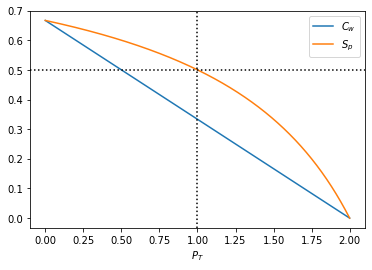

In [4]:
PT = np.linspace(0,2, 1000)
Cw = 2./3-1/3*(PT)
Sp = (PT-2)/(PT-3)

plt.plot(PT, Cw, label=r'$C_w$')
plt.plot(PT, Sp, label=r'$S_p$')
plt.axhline(0.5, c='k', ls=':')
plt.axvline(1.0, c='k', ls=':')
plt.xlabel(r"$P_T$")
plt.legend()
plt.show()

Looking at the graph we can say, if the sum of the probabilty ($P_T$) is less than 1 it is better to switch the door when given the option. If the sum of the probabilty is greater than 1 it is better to keep the door you originally chose. Only when the probabilty is exactly 1.0, there is no winning strategy!

$$
Strategy =
\begin{cases}
\text{Switch} & \quad \text{when $P_T < 1$}\\ 
\text{Coin Toss} & \quad \text{when $P_T = 1$}\\
\text{Stick} & \quad \text{when $P_T > 1$}
\end{cases}
$$

---

### More Doors, More Cars, More Goats!

Okay, lets go mad. What happens if you have $N_{Doors}$ with a random, but known, number of cars and goats. Where every goat has their own probabilty of locking you in?

* For a first pass lets say that you only get one chance to switch and you can't combo multiple goats
* Monty is now removing cars and goats without discrimination

Chances of switching:
$$C_{sw} = \dfrac{1}{N_{Doors}}\left(N_{Cars} + \sum_{x}^{N_{Goats}}(1-P_x) \right) $$




Chances of picking a Car when you swicth:
$$C_{c} = \dfrac{R_{Cars}}{N_{Doors}-2} $$




Where $R_{Cars}$ are the remaining cars, we can't know this for sure so we have to estimate:
$$ \hat R_{Cars} =  \dfrac{N_{Cars}(N_{Doors} - 2)}{N_{Doors}} $$

Finally, we can get chances of winning:
$$ C_w = C_c C_{sw} =  \dfrac{N_{Cars}}{N_{Doors}^2}\left(N_{Cars} + \sum_{x}^{N_{Goats}}(1-P_x) \right) $$

In [5]:
# Build a list of random length with a random numvber of cars and goats

W=0
L=0
Switches=0
N = 50000 #lots more variability need a few more runs to focus the number

Nd = random.randint(200,300) #Number of Doors
Doors = ['G' if random.uniform(0,1)<=0.756 else 'C' for _ in range(Nd)] #Get goats and cars behind doors
Nc = Doors.count('C') #Number of cars
Ng = Doors.count('G') #Number of goats

# Ensure at least one car and one goat in the list
if 'C' not in Doors:
    Doors.append('C')
if 'G' not in Doors:
    Doors.append('G')
    
P_list = [0.0 if i == 'C' else random.uniform(0,1) for i in Doors] #list of probabilities


for i in range(N):
    Doors2 = list(zip(Doors, P_list))
    random.shuffle(Doors2)
    pick = random.randint(0, len(Doors2)-1)
    
    if Doors2[pick][0] == 'G':
        if random.uniform(0,1)<=Doors2[pick][1]:
            L+=1
        else:
            Doors2.pop(pick)
            Doors2.pop(random.randint(0, len(Doors2)-1)) #Monty removes a random door
            Switches += 1
            pick = random.randint(0, len(Doors2)-1)
            if Doors2[pick][0] == 'G':
                L+=1
            else:
                W+=1
            
    else:
        Doors2.pop(pick)
        Doors2.pop(random.randint(0, len(Doors2)-1)) #Monty removes a random door
        Switches += 1
        pick = random.randint(0, len(Doors2)-1)
        if Doors2[pick][0] == 'G':
            L+=1
        else:
            W+=1

Csw = sum([1-x if x!=0 else 0 for x in P_list])

print(W/N)
print(Nc/Nd**2*(Nc+Csw))

0.17698
0.17785043600243225


Is there a rule we can use that determines if switching is a good idea? We can work out switching power by dividing the chances of switching by the chances of winning:
$$S_p = \dfrac{C_w}{C_{sw}} = \dfrac{N_{Cars}}{N_{Doors}^2}N_{Doors} = \dfrac{N_{Cars}}{N_{Doors}} = C_{c}$$

In [6]:
print(W/Switches)
print(Nc/Nd)

0.2591063480908878
0.2608695652173913


so, weirdly, what decides if you should switch is the ratio of the cars to the number of doors and there is no bearing on the probabilty of getting locked in if you pick a goat.

$$
Strategy =
\begin{cases}
\text{Switch} & \quad \text{when $N_c/N_d < 0.5$}\\ 
\text{Coin Toss} & \quad \text{when $N_c/N_d = 0.5$}\\
\text{Stick} & \quad \text{when $N_c/N_d > 0.5$}
\end{cases}
$$

---

Okay that's all the time I can waste for now. May come back in the future to probe further!